In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
titanic_data=pd.read_csv('data/train.csv')

In [6]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
"""
sibsp	# of siblings / spouses aboard the Titanic
parch	# of parents / children aboard the Titanic
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
"""
"""
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
ie.how many relations(siblings or spouse) of the individual are on the board

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
ie.how many relations(parents or childdrten) of the individual are on the board
"""

'\npclass: A proxy for socio-economic status (SES)\n1st = Upper\n2nd = Middle\n3rd = Lower\n\nage: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5\n\nsibsp: The dataset defines family relations in this way...\nSibling = brother, sister, stepbrother, stepsister\nSpouse = husband, wife (mistresses and fiancés were ignored)\nie.how many relations(siblings or spouse) of the individual are on the board\n\nparch: The dataset defines family relations in this way...\nParent = mother, father\nChild = daughter, son, stepdaughter, stepson\nSome children travelled only with a nanny, therefore parch=0 for them.\nie.how many relations(parents or childdrten) of the individual are on the board\n'

In [9]:
titanic_data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [10]:
titanic_data['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [11]:
titanic_data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [12]:
titanic_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [13]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

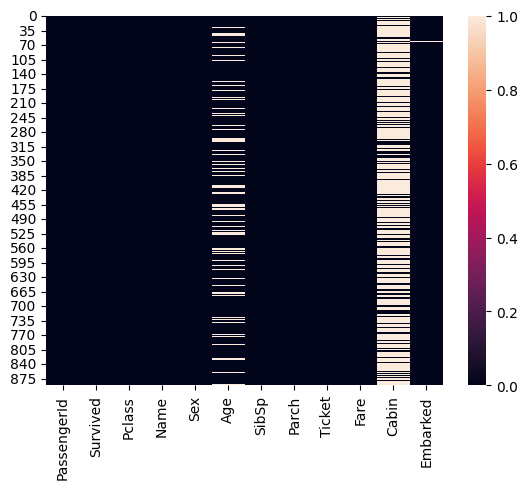

In [15]:
sns.heatmap(titanic_data.isnull())

<Axes: >

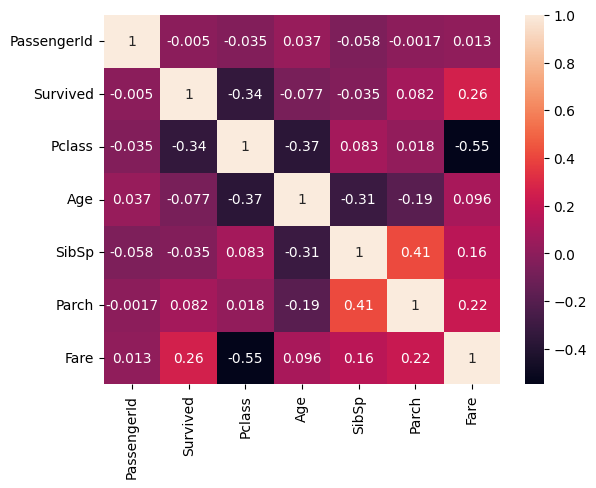

In [16]:
sns.heatmap(data=titanic_data.corr(numeric_only=True),annot=True)

In [17]:
titanic_data.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [18]:
"""
Observation:
 everything -ve ly and +ve ly correlated are considered 
 but not as values close to zero
 because zero menas basically ,it's kind of random,not really correlated
 towards +1:higher this values gets ,higher other value gets
 towards -1:higher this values gets ,lower other value gets
"""

"\nObservation:\n everything -ve ly and +ve ly correlated are considered \n but not as values close to zero\n because zero menas basically ,it's kind of random,not really correlated\n towards +1:higher this values gets ,higher other value gets\n towards -1:higher this values gets ,lower other value gets\n"

<Axes: xlabel='Pclass', ylabel='Age'>

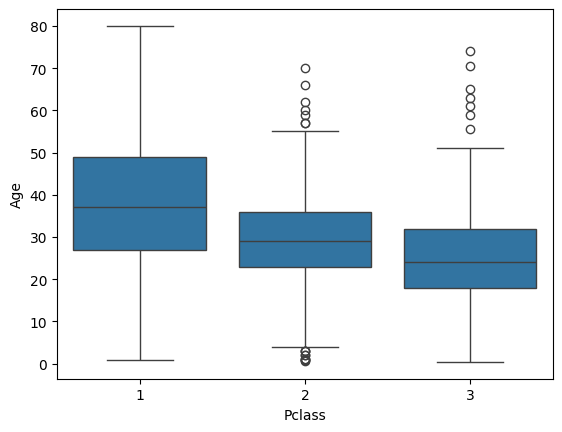

In [19]:
sns.boxplot(data=titanic_data,x='Pclass',y='Age')

In [20]:
titanic_data[titanic_data['Pclass']==1]['Age'].mean()

38.233440860215055

In [21]:
titanic_data[titanic_data['Pclass']==2]['Age'].mean()

29.87763005780347

In [22]:
titanic_data[titanic_data['Pclass']==3]['Age'].mean()

25.14061971830986

<Axes: >

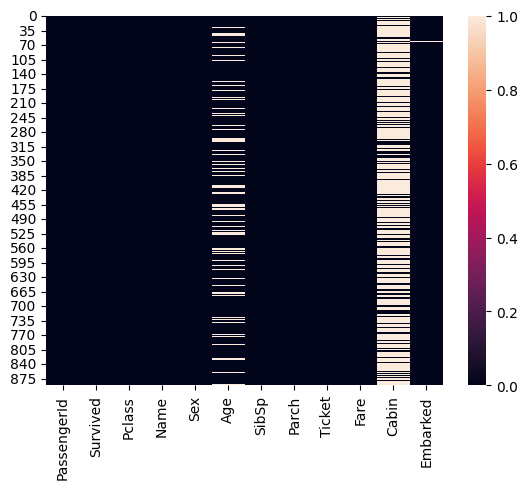

In [23]:
sns.heatmap(titanic_data.isnull())

<Axes: xlabel='Parch', ylabel='Age'>

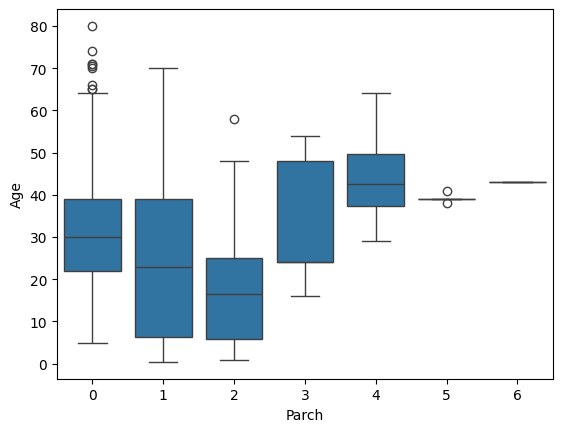

In [24]:
sns.boxplot(data=titanic_data,x='Parch',y='Age')

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

In [26]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2)

In [27]:
for train_indices,test_indices in split.split(titanic_data,titanic_data[['Survived','Pclass','Sex']]):
  strat_train_set=titanic_data.loc[train_indices]
  strat_test_set=titanic_data.loc[test_indices]

In [28]:
strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
442,443,0,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,347076,7.7750,NaN,S
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
227,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
645,646,1,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,D33,C
517,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
478,479,0,3,"Karlsson, Mr. Nils August",male,22.0,0,0,350060,7.5208,NaN,S
221,222,0,2,"Bracken, Mr. James H",male,27.0,0,0,220367,13.0000,NaN,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S


In [29]:
strat_train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.0750,NaN,S
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.5500,NaN,S
336,337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,C2,S
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
492,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
707,708,1,1,"Calderhead, Mr. Edward Pennington",male,42.0,0,0,PC 17476,26.2875,E24,S
817,818,0,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C
761,762,0,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.0,0,0,SOTON/O2 3101272,7.1250,NaN,S


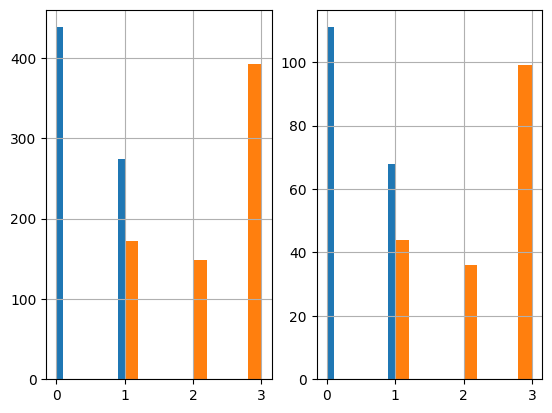

In [30]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()
plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

In [31]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 374 to 355
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          566 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        161 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [33]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 442 to 745
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Survived     179 non-null    int64  
 2   Pclass       179 non-null    int64  
 3   Name         179 non-null    object 
 4   Sex          179 non-null    object 
 5   Age          148 non-null    float64
 6   SibSp        179 non-null    int64  
 7   Parch        179 non-null    int64  
 8   Ticket       179 non-null    object 
 9   Fare         179 non-null    float64
 10  Cabin        43 non-null     object 
 11  Embarked     178 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.2+ KB


In [34]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer

In [35]:
#from sklearn.preprocessing import StandardScaler

In [36]:
class AgeImputer(BaseEstimator,TransformerMixin):
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    imputer=SimpleImputer(strategy='mean')
    X['Age']=imputer.fit_transform(X[['Age']])
    return X
"""
he AgeImputer class is designed to fill missing values in the "Age" column using the mean of the non-missing values. This process is known as imputation.
"""

'\nhe AgeImputer class is designed to fill missing values in the "Age" column using the mean of the non-missing values. This process is known as imputation.\n'

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
class FeatureEncoder(BaseEstimator,TransformerMixin):
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    encoder=OneHotEncoder()
    matrix=encoder.fit_transform(X[['Embarked']]).toarray()
    column_names=['C','S','Q','N']
    for i in range (len(matrix.T)):
      X[column_names[i]]=matrix.T[i]

    matrix=encoder.fit_transform(X[['Sex']]).toarray()
    column_names=['Female','Male']
    for i in range(len(matrix.T)):
      X[column_names[i]]=matrix.T[i]

    return X

In [39]:
class FeatureDropper(BaseEstimator,TransformerMixin):
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    X_dropped = X.drop(['Embarked', 'Name', 'Ticket', 'Cabin', 'Sex', 'N'], axis=1, errors='ignore')
    print(X_dropped.head())  # Print the first few rows to debug
    return X_dropped

In [40]:
#these are three estimators to use the pipleine

In [41]:
from sklearn.pipeline import Pipeline

In [42]:
pipeline=Pipeline([
  ('ageimputer',AgeImputer()),
  ('featureencoder',FeatureEncoder()),
  ('feturedropper',FeatureDropper())
  ])

In [43]:
strat_train_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [44]:
strat_train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.0750,NaN,S
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.5500,NaN,S
336,337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,C2,S
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S


In [45]:
"""age_imputer = AgeImputer()
X_age_imputed = age_imputer.fit_transform(strat_train_set)
print(X_age_imputed.head())"""
"""feature_encoder = FeatureEncoder()
X_encoded = feature_encoder.fit_transform(X_age_imputed)
print(X_encoded.head())"""

'feature_encoder = FeatureEncoder()\nX_encoded = feature_encoder.fit_transform(X_age_imputed)\nprint(X_encoded.head())'

In [46]:
strat_train_set=pipeline.fit_transform(strat_train_set)

     PassengerId  Survived  Pclass        Age  SibSp  Parch     Fare    C  \
374          375         0       3   3.000000      3      1  21.0750  0.0   
42            43         0       3  28.939647      0      0   7.8958  1.0   
235          236         0       3  28.939647      0      0   7.5500  0.0   
336          337         0       1  29.000000      1      0  66.6000  0.0   
176          177         0       3  28.939647      3      1  25.4667  0.0   

       S    Q  Female  Male  
374  0.0  1.0     1.0   0.0  
42   0.0  0.0     0.0   1.0  
235  0.0  1.0     1.0   0.0  
336  0.0  1.0     0.0   1.0  
176  0.0  1.0     0.0   1.0  


In [47]:
strat_train_set.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
374,375,0,3,3.000000,3,1,21.0750,0.0,0.0,1.0,1.0,0.0
42,43,0,3,28.939647,0,0,7.8958,1.0,0.0,0.0,0.0,1.0
235,236,0,3,28.939647,0,0,7.5500,0.0,0.0,1.0,1.0,0.0
336,337,0,1,29.000000,1,0,66.6000,0.0,0.0,1.0,0.0,1.0
176,177,0,3,28.939647,3,1,25.4667,0.0,0.0,1.0,0.0,1.0


<Axes: >

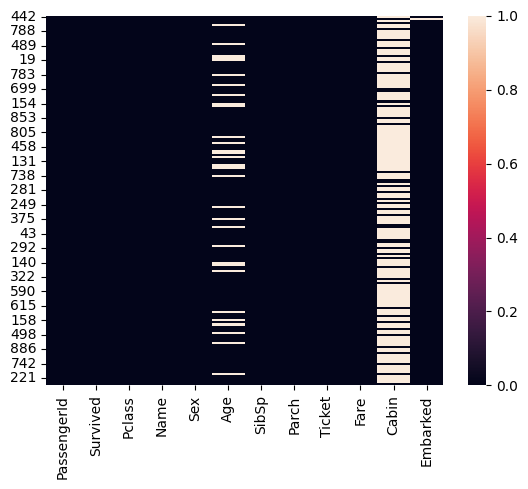

In [48]:
sns.heatmap(strat_test_set.isnull())

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler=StandardScaler()

In [51]:
X=strat_train_set.drop('Survived',axis=1)
y=strat_train_set['Survived']

In [52]:
X_data=scaler.fit_transform(X)
y_data=y.to_numpy(y)

In [53]:
X_data

array([[-0.27615649,  0.82789342, -2.03656597, ...,  0.61197825,
         1.35941164, -1.35941164],
       [-1.5706551 ,  0.82789342,  0.        , ..., -1.63404501,
        -0.73561236,  0.73561236],
       [-0.81813031,  0.82789342,  0.        , ...,  0.61197825,
         1.35941164, -1.35941164],
       ...,
       [ 1.45114135, -0.37019624,  0.16176186, ..., -1.63404501,
        -0.73561236,  0.73561236],
       [ 1.23279219,  0.82789342,  0.94687895, ...,  0.61197825,
        -0.73561236,  0.73561236],
       [-0.35023924,  0.82789342, -0.07377326, ...,  0.61197825,
        -0.73561236,  0.73561236]])

In [54]:
y_data

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [56]:
clf3=RandomForestClassifier()
param_grid=[
  {'n_estimators':[10,100,200,500],'max_depth':[None,5,10],'min_samples_split':[2,3,4]}
]

grid_search=GridSearchCV(clf3,param_grid,cv=3,scoring='accuracy',return_train_score=True)
grid_search.fit(X_data,y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [57]:
final_clf3=grid_search.best_estimator_
final_clf3

RandomForestClassifier(max_depth=10, min_samples_split=3)

In [58]:
from sklearn.metrics import confusion_matrix,classification_report

In [59]:
strat_test_set=pipeline.fit_transform(strat_test_set)

     PassengerId  Survived  Pclass        Age  SibSp  Parch     Fare    C  \
442          443         0       3  25.000000      1      0   7.7750  0.0   
61            62         1       1  38.000000      0      0  80.0000  0.0   
227          228         0       3  20.500000      0      0   7.2500  0.0   
645          646         1       1  48.000000      1      0  76.7292  1.0   
517          518         0       3  32.603581      0      0  24.1500  0.0   

       S    Q  Female  Male  
442  0.0  1.0     0.0   1.0  
61   0.0  0.0     1.0   0.0  
227  0.0  1.0     0.0   1.0  
645  0.0  0.0     0.0   1.0  
517  1.0  0.0     0.0   1.0  


In [60]:
X_test=strat_test_set.drop('Survived',axis=1)
y_test=strat_test_set['Survived']

In [61]:
scaler=StandardScaler()
X_data_test=scaler.fit_transform(X_test)
y_data_test=y_test.to_numpy()

In [62]:
final_clf3.score(X_data_test,y_data_test)

0.7877094972067039

In [63]:
final_data=pipeline.fit_transform(titanic_data)

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare    C    S    Q  \
0            1         0       3  22.0      1      0   7.2500  0.0  0.0  1.0   
1            2         1       1  38.0      1      0  71.2833  1.0  0.0  0.0   
2            3         1       3  26.0      0      0   7.9250  0.0  0.0  1.0   
3            4         1       1  35.0      1      0  53.1000  0.0  0.0  1.0   
4            5         0       3  35.0      0      0   8.0500  0.0  0.0  1.0   

   Female  Male  
0     0.0   1.0  
1     1.0   0.0  
2     1.0   0.0  
3     1.0   0.0  
4     0.0   1.0  


In [64]:
X_final=final_data.drop('Survived',axis=1)
y_final=final_data['Survived']

In [65]:
scaler=StandardScaler()
X_data_final=scaler.fit_transform(X_final)
y_data_final=y_final.to_numpy()

In [66]:
prod_clf=RandomForestClassifier()
param_grid=[
  {'n_estimators':[10,100,200,500],'max_depth':[None,5,10],'min_samples_split':[2,3,4]}
]

grid_search=GridSearchCV(prod_clf,param_grid,cv=3,scoring='accuracy',return_train_score=True)
grid_search.fit(X_data_final,y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [67]:
prod_final_clf=grid_search.best_estimator_

In [68]:
prod_final_clf#finalmodel

RandomForestClassifier(max_depth=5)

In [69]:
titanic_test_data=pd.read_csv('data/test.csv')

In [70]:
titanic_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [71]:
final_test_data=pipeline.fit_transform(titanic_test_data)

   PassengerId  Pclass   Age  SibSp  Parch     Fare    C    S    Q  Female  \
0          892       3  34.5      0      0   7.8292  0.0  1.0  0.0     0.0   
1          893       3  47.0      1      0   7.0000  0.0  0.0  1.0     1.0   
2          894       2  62.0      0      0   9.6875  0.0  1.0  0.0     0.0   
3          895       3  27.0      0      0   8.6625  0.0  0.0  1.0     0.0   
4          896       3  22.0      1      1  12.2875  0.0  0.0  1.0     1.0   

   Male  
0   1.0  
1   0.0  
2   1.0  
3   1.0  
4   0.0  


In [72]:
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [73]:
X_final_test=final_test_data
X_final_test=X_final_test.fillna(method='ffill')#what  is this?

C:\Users\kannoth\AppData\Local\Temp\ipykernel_13964\2034437880.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_final_test=X_final_test.fillna(method='ffill')#what  is this?


In [74]:
scaler=StandardScaler()

In [75]:
X_data_final_test=scaler.fit_transform(X_final_test)

In [76]:
predictions=prod_final_clf.predict(X_data_final_test)


In [77]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [78]:
final_df=pd.DataFrame(titanic_test_data['PassengerId'])

In [79]:
final_df

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [80]:
final_df['Survived']=predictions

In [81]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [82]:
#to csv
final_df.to_csv('predictions_model_no1.csv',index=False)